In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# author    : Upayan De, Farhan Ikbal
# date      : Oct 17 2022

**Data** **Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create generator
datagen = ImageDataGenerator(
        width_shift_range = 0.5 ,
        height_shift_range = 0.5 ,
        horizontal_flip = True ,
        vertical_flip = True ,
        rotation_range = 90 ,
        brightness_range = [0.5 , 1.5] ,
        zoom_range = [0.5 , 1.5] ,
)

# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/TrashNet/train' , class_mode = 'categorical')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/TrashNet/val' , class_mode = 'categorical')
test_it = datagen.flow_from_directory('/content/drive/MyDrive/TrashNet/test' , class_mode = 'categorical')

# confirm the iterator works
batchX , batchy = train_it.next()
print('Batch shape = %s , min = %.3f , max = %.3f' % (batchX.shape , batchX.min() , batchX.max()))

Found 2026 images belonging to 6 classes.
Found 380 images belonging to 6 classes.
Found 130 images belonging to 6 classes.
Batch shape = (32, 256, 256, 3) , min = 0.000 , max = 255.000


In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten
from keras.layers import Dense
from keras import Model

# load model and specify a new input shape for images and avg pooling output
model = VGG16(include_top = False , input_shape = (256 , 256 , 3))

# mark loaded layers as not trainable
for layer in model.layers:
        layer.trainable = False

# add new classifier layers
flat1 = Flatten()(model.output)
dense1 = Dense(1024 , activation = 'relu')(flat1)
#dense2 = Dense(512 , activation = 'relu')(dense1)
#dense3 = Dense(256 , activation = 'relu')(dense2)
#dense4 = Dense(128 , activation = 'relu')(dense3)
output = Dense(6 , activation = 'softmax')(dense1)

# define new model
model = Model(inputs = model.inputs , outputs = output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# compile model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])   # Changed optimiser from sgd to adam (F)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-4)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# fit model
history = model.fit(
        train_it ,
        epochs = 25 ,
        validation_data = val_it ,
        callbacks = [lrr]
)

Epoch 1/25
64/64 [==============================] - ETA: 0s - loss: 13.1913 - accuracy: 0.4304 

In [ ]:
# evaluate model
model.evaluate(test_it)

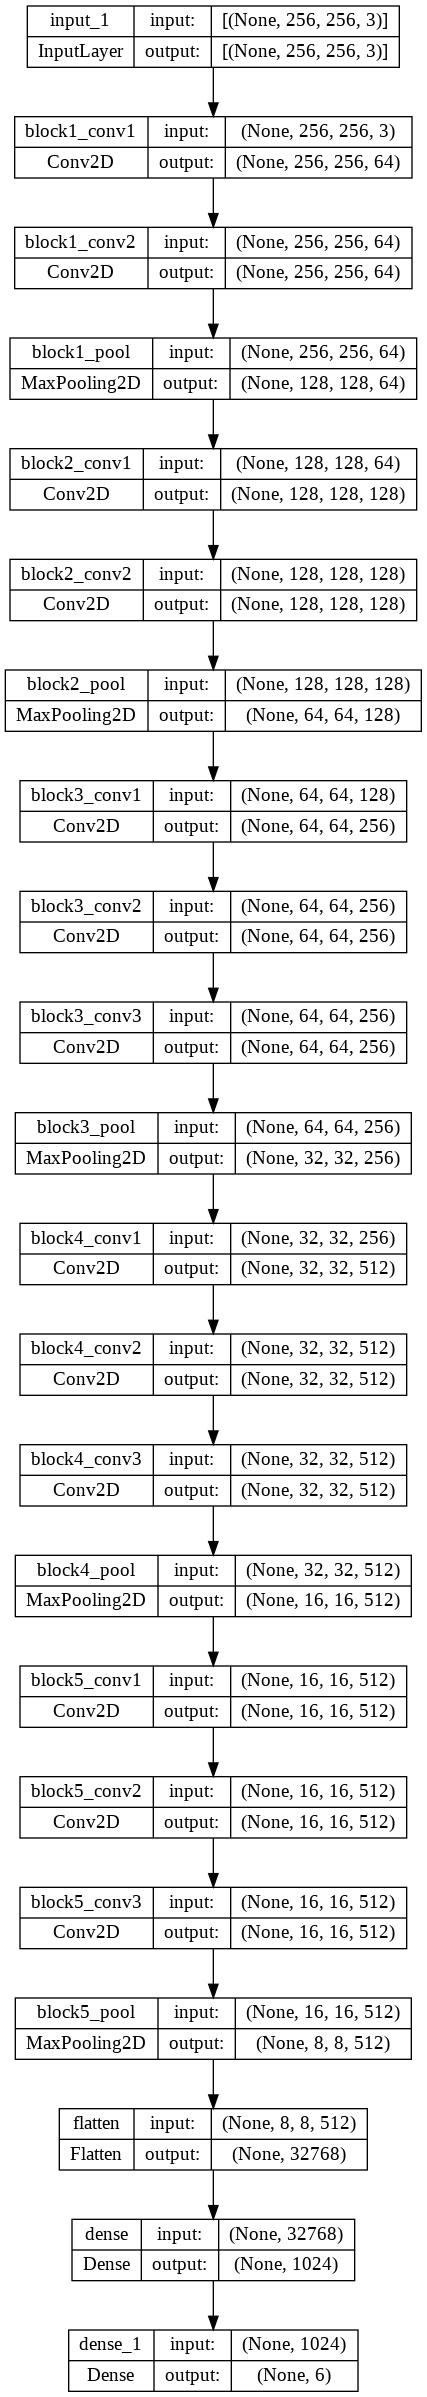

In [ ]:
from keras.utils import plot_model

# plot_model
plot_model(model , show_shapes = True)

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()